# EDA
In this notebook, I will take a look at general distribution and simple descriptive stats of the data.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import pickle

import os

from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re


In [3]:
artdf = pd.read_pickle('PkL/merged_artworks_recent.pkl')

## Counts
Total counts of data from each data set

In [21]:
n_flickr = len(os.listdir('IMAGES/Flicker/Flicker8k_Dataset/'))
n_art = len(artdf)

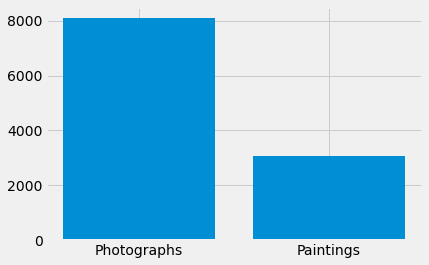

In [25]:
plt.bar(['Photographs', 'Paintings'], [n_flickr, n_art])
plt.show()

We had over 8000 photos with captions from Flickr dataset provided by Machine Learning Mastery and Illinois State University. And over 3000 paintings collected from three museum APIs.

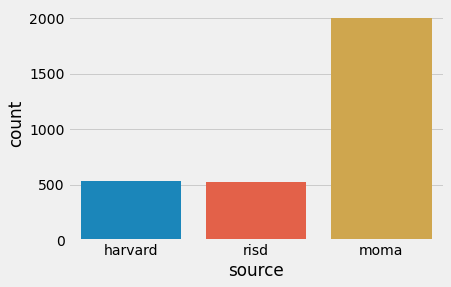

In [32]:
sns.countplot(x = 'source', data = artdf)
plt.show()

Out of the 3, most images were from the Museum of Modern Art. Over 500 images from Harvard Museum and Rhode Island School of Design were also collected.

## Text Data
---
Now let's look at what text data shows.

### Flickr Photo Descriptions

In [44]:
# loading text
with open('PKL/descriptions.pkl', 'rb') as fp:
        description_set = pickle.load(fp)
        
# unnesting
descriptions = list(chain.from_iterable(description_set.values()))
# combine all
desc = ' '.join(descriptions)

In [67]:
# initialize stopwords and lemmatizer

sw = stopwords.words('english')
sw += ['seqini', 'seqfin']
wnl = WordNetLemmatizer()

In [68]:
# preprocess and tokenize
clean_desc = [wnl.lemmatize(x) for x in desc.split() if x not in sw]

In [72]:
# count word frequencies
desc_count = Counter(clean_desc)
top20 = {x[0]: x[1] for x in desc_count.most_common(20)}

In [93]:
# total word counts
len(desc_count)

7451

There's a total 7451 unique vocabularies that are not stopwords.

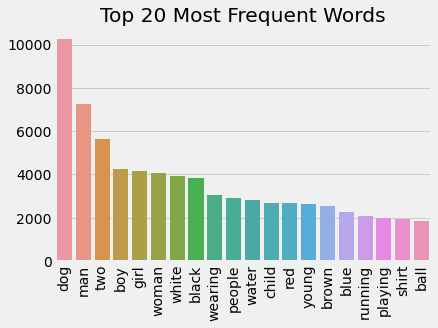

In [87]:
g = sns.barplot(list(top20.keys()), list(top20.values()))
g.set(title = 'Top 20 Most Frequent Words')
plt.xticks(rotation = 90)
plt.show()

It seems like this dataset contains pretty standard sentences and images with a limited set of words.

### Art Descriptions

In [53]:
# loading text
with open('PKL/img_captions1.pkl', 'rb') as fp:
        art_desc1 = pickle.load(fp)
# loading text
with open('PKL/img_captions2.pkl', 'rb') as fp:
        art_desc2 = pickle.load(fp)
# combine
art_desc = list(art_desc1.values()) + list(art_desc2.values())

In [54]:
# only keep string instances
art_desc = [x for x in art_desc if isinstance(x, str)]
#combine all 
comb_artdesc = ' '.join(art_desc)

In [115]:
# preprocessing and tokenization
clean_artdesc = [wnl.lemmatize(x.lower()) for x in comb_artdesc.split() if x not in sw]

In [116]:
# count word frequencies
art_desc_count = Counter(clean_artdesc)

In [117]:
# most frequent words
top20_art = {x[0]: x[1] for x in art_desc_count.most_common(20)}

In [118]:
# total vocabulary counts
len(art_desc_count)

3549

There's a total 3549 unique vocabularies that are not stopwords.

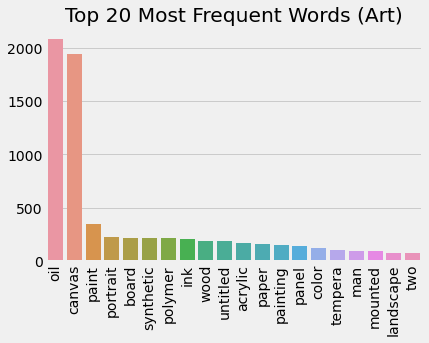

In [119]:
g = sns.barplot(list(top20_art.keys()), list(top20_art.values()))
g.set(title = 'Top 20 Most Frequent Words (Art)')
plt.xticks(rotation = 90)
plt.show()

Much less common words other than oil and canvas. It's a lot more noisy as expected.

### Combined Texts

In [120]:
# count word frequencies
total_desc_count = Counter(clean_artdesc + clean_desc)

In [121]:
top20_total = {x[0]: x[1] for x in total_desc_count.most_common(20)}

In [122]:
len(total_desc_count)

9669

There's a total 9669 unique vocabularies that are not stopwords, I guess not many words are repeated.

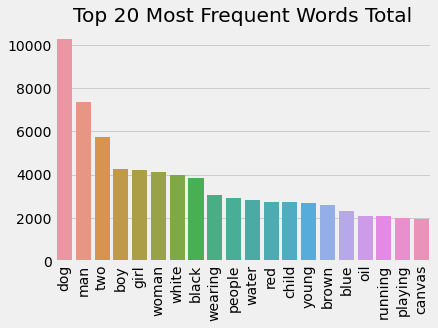

In [124]:
g = sns.barplot(list(top20_total.keys()), list(top20_total.values()))
g.set(title = 'Top 20 Most Frequent Words Total')
plt.xticks(rotation = 90)
plt.show()

# Image Data
Now let's take a look at some image data we have.

### Loading Data

In [25]:
flickr_dir = 'IMAGES/Flicker/Flicker8k_Dataset'
img_dir = 'IMAGES/paintings'

In [26]:
flickr_imgs = [fn for fn in os.listdir(flickr_dir) if fn.endswith('.jpg')]
art_imgs = [fn for fn in os.listdir(img_dir) if fn.endswith('.jpg')]

### Example Images
I'll first look at some random images.

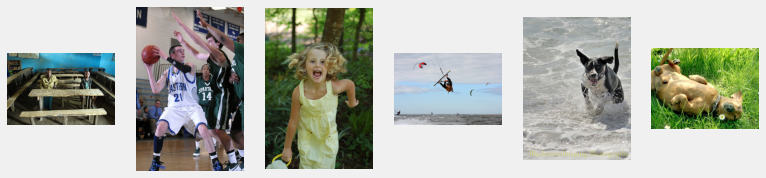

In [23]:
fig = plt.figure(figsize = (12, 3))

for i in range(6):
    select_img = np.random.choice(flickr_imgs, 1)[0]
    ax = fig.add_subplot(1, 6, i+1)
    img = mpimg.imread(f'{flickr_dir}/{select_img}')
    plt.imshow(img)
    plt.axis('off')

plt.show()

A lot of variability. But mostly specific subjects with some action involved. It will be very different from many of our art.

### Example Artworks
How about artworks?

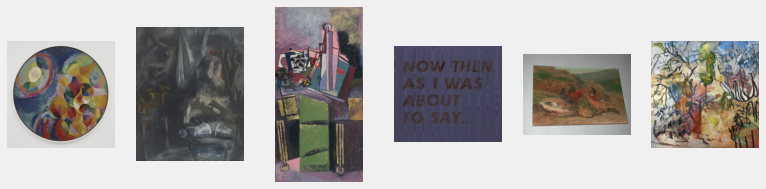

In [31]:
fig = plt.figure(figsize = (12, 3))

for i in range(6):
    select_img = np.random.choice(art_imgs, 1)[0]
    ax = fig.add_subplot(1, 6, i+1)
    img = mpimg.imread(f'{img_dir}/{select_img}')
    plt.imshow(img)
    plt.axis('off')

plt.show()

Definitely a lot more vague. It's hard to describe them myself. Let's see what are the actual description of some of these.

In [61]:
def plot_img_desc(dir_, dict_):
    imgs = [fn for fn in os.listdir(dir_) if fn.endswith('.jpg')]
    select_img = np.random.choice(imgs, 1)[0]
    
    img = mpimg.imread(f'{dir_}/{select_img}')
    plt.imshow(img)
    plt.axis('off')

    plt.show()
    
    val = dict_[select_img[:-4]]
    if isinstance(val, list): 
        for x in val: 
            print(' '.join([z for z in x.split() if z not in ['seqini', 'seqfin']]))
    else:
        print(val)

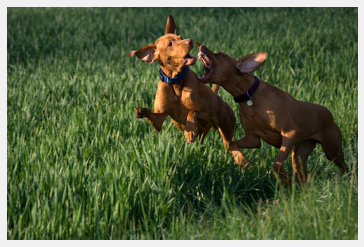

one dog biting at another dog face in grassy field
there are two brown dogs playing in field
two brown dogs with blue collars are running in the grass
two dogs are fighting and playing with each other while running through some grass
two dogs are playing in the grass


In [62]:
plot_img_desc(flickr_dir, description_set)

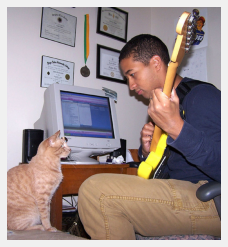

man plays song on the guitar for his cat
man plays yellow guitar while cat watches him
man plays his yellow guitar while staring at his cat
man sitting by his computer playing guitar to his cat
the man is playing guitar and sitting with cat


In [64]:
plot_img_desc(flickr_dir, description_set)

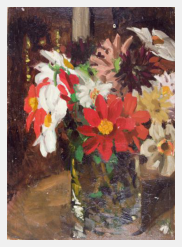

still life with vase of flowers


In [63]:
plot_img_desc(img_dir, art_desc1)

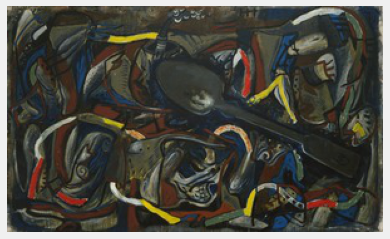

the large spoon


In [66]:
plot_img_desc(img_dir, art_desc1)